Символьная генетика. Подбор формулы описывающий кусок графика акциию

Задание

- Ниже приведенным кодом загрузить реальный датасет Лукойла
- Взять значения каждые 60 минут
- из полученного датасета взять для тестирования интересный фрагмент, например с 100 по 200

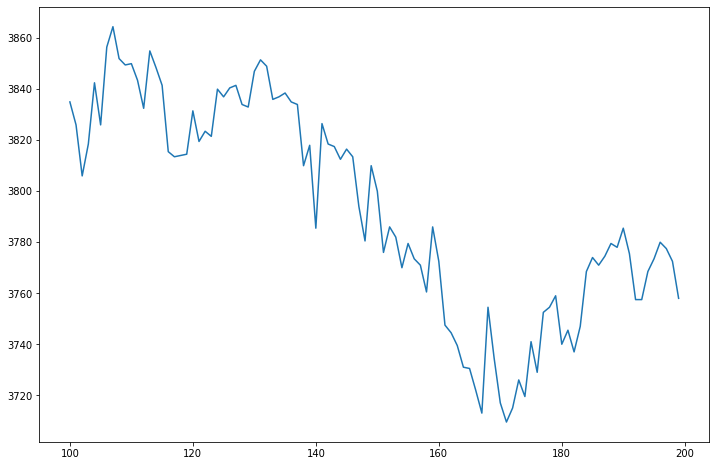

- подготовить эти данные для кода символьной генетики по примеру как подавались синтетические данные.

- собрать на основе учебеного ноутбука код символьной генетики и с его помощью найти максимально близко описывающее символьное дерево.

- доработки и оптимизации в коде класса приветствуются!


---

У вас может получиться вполне близко описывающее график дерево

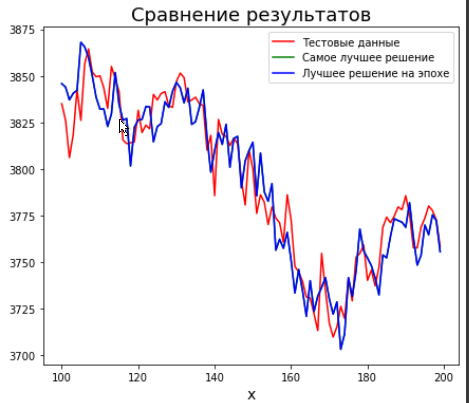


**Необходимые библиотеки**

In [ ]:
from copy import deepcopy                                                   # создание копии
import matplotlib.pyplot as plt                                             # отрисовка графиков

from graphviz import Digraph, Source                                        # отрисовка графов

from IPython.display import clear_output, display, Image                    # отображени в поле вывода и очистка
import cv2                                                                  # для работы с изображениями

import numpy as np                                                          # нампи
from random import random, randint, seed, choice, shuffle                   # случайные данные и действия

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error         # функциии ошибок

from tqdm.notebook import tqdm                                              # отображения процесса в цикле

import warnings                                                             # игнорирование ошибок  вывода
warnings.filterwarnings('ignore')

Загрузка данных 

Загрузим данные акций за 18-19 года:

In [ ]:
# для загрузки данных по ссылке
import gdown
# Пандас
import pandas as pd 

In [ ]:
# Загрузка датасетов из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l11/18_19.csv', None, quiet=True)

'18_19.csv'

Ваш код

Готовим датасет

In [ ]:
ds=pd.read_csv('18_19.csv',sep=';')

In [ ]:
ds.head(20)

,DATE,TIME,OPEN,MAX,MIN,CLOSE,VOLUME
0,03.01.2018,10:00:00,3341.0,3356.0,3340.0,3355.0,6088
1,03.01.2018,10:01:00,3355.0,3359.0,3353.0,3353.0,1624
2,03.01.2018,10:02:00,3351.5,3357.5,3351.5,3357.5,722
3,03.01.2018,10:03:00,3354.5,3360.0,3354.5,3358.0,3034
4,03.01.2018,10:04:00,3358.0,3360.0,3351.5,3360.0,1427
5,03.01.2018,10:05:00,3360.0,3363.5,3346.5,3353.0,3390
6,03.01.2018,10:06:00,3350.5,3351.5,3348.5,3350.0,412
7,03.01.2018,10:07:00,3350.5,3353.0,3349.0,3353.0,156
8,03.01.2018,10:08:00,3354.0,3354.5,3352.5,3354.5,123
9,03.01.2018,10:09:00,3352.5,3352.5,3352.5,3352.5,1


In [ ]:
NPArr=ds['CLOSE'].to_numpy()

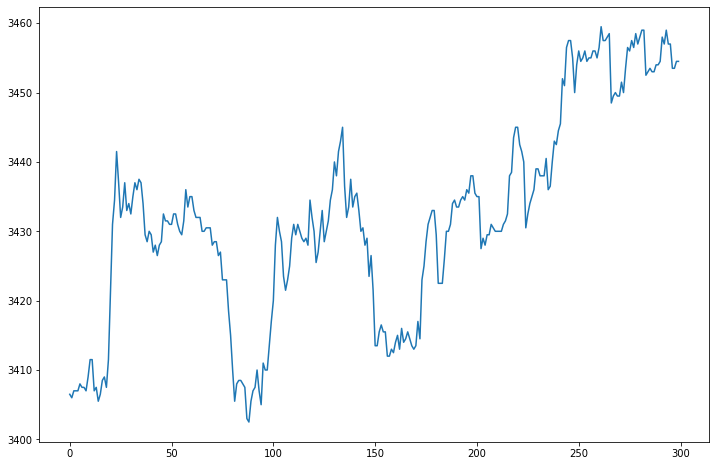

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(NPArr[500:800])
plt.show()

In [ ]:
DATASET = NPArr[500:800]
DATASET = np.vstack((np.arange(len(DATASET)),DATASET))
DATASET = np.transpose(DATASET)

In [ ]:
from copy import deepcopy                                                   # создание копии

from graphviz import Digraph, Source                                        # отрисовка графов

from IPython.display import clear_output, display, Image                    # отображени в поле вывода и очистка
import cv2                                                                  # для работы с изображениями
                                                         # нампи
from random import random, randint, seed, choice, shuffle                   # случайные данные и действия

from sklearn.metrics import mean_squared_error, mean_absolute_error         # функциии ошибок

from tqdm.notebook import tqdm                                              # отображения процесса в цикле

import warnings                                                             # игнорирование ошибок  вывода
warnings.filterwarnings('ignore')

In [ ]:
class BinaryTree:
      """
      Класс Бинарного дерева
      """
      def __init__(self, value = None, left = None, right = None):
          self.value = value     # корень дерева
          self.left  = left      # левая ветка
          self.right = right     # правая ветка

      def depth_tree(self, tree, condition = False):
          """
          Глубина дерева
          tree - класс дерева
          condition - дополнительно условие для счетчика

          """
          # если есть условие возвращаем 0
          if condition and type(tree.value) == condition: return 0 
          # если нет условия
          # получаем длину по левой ветки рекурсией, если она есть, если нет 0
          l = self.depth_tree(tree.left, condition)  if tree.left  else 0
          # получаем длину по левой ветки рекурсией, если она есть, если нет 0
          r = self.depth_tree(tree.right, condition) if tree.right else 0
          # выводим максимум от правой и левой плюс 1 (корень)
          return 1 + max(l, r)

      def size_tree(self, tree, condition = False):
          """
          Количество узлов дерева
          """
          # если есть условие возвращаем 1
          if condition and type(tree.value) == condition: return 1
          # если нет условия
          # получаем длину по левой ветки рекурсией, если она есть, если нет 0
          l = self.size_tree(tree.left, condition)  if tree.left  else 0
          # получаем длину по левой ветки рекурсией, если она есть, если нет 0
          r = self.size_tree(tree.right, condition) if tree.right else 0
          # выводим сумму правой и левой плюс 1 (корень)
          return 1 + l + r


      #########################################################################
      #                     ВЫВОД ВИЗУАЛЬНОЙ СТРУКТУРЫ ДЕРЕВА                 #
      #########################################################################

      def __node_label(self, tree):
          """
          Определение имени в узле
          """
          try:
              # если это функция или активация, то выдаст имя
              return tree.value.__name__
          except:
              # если не, то это переменная или константа
              return str(tree.value) # получаем имя в строком виде

      def __draw(self, tree, dot, count, style): 
          """
          Метод отображения дерева
          tree - отображаемое дерево

          """
          # порядковый номер узла
          number_node = str(count[0])
          # метка узла из имени
          label_node = self.__node_label(tree)
  
          # эту условие будет использывано ниже для разнообразия
          # в отоброжении дерева
          if style: # если стиль задан
             style_node = style(label_node)  # получаем стиль из функции 
             # рисуем узел в заданном стиле      
             dot[0].node(number_node, label_node, style_node)

          else: # если стиль не задан, то рисуем базовый вариант
             # рисуем узел в базовом стиле если style = False
             dot[0].node(number_node, label_node, style)
             
          if tree.left:       # если есть левая ветка
              count[0] += 1   # увеличиваем порядковый номер
              # рисуем связь в базовом стиле (не усложняли тут)
              dot[0].edge(number_node, str(count[0]))
              # применяем рекурсивно к левому узлу ветки саму функцию
              self.__draw(tree.left, dot, count, style)
          if tree.right:      # если есть левая ветка
              count[0] += 1   # увеличиваем порядковый номер
              # рисуем связь в базовом стиле (не усложняли тут)
              dot[0].edge(number_node, str(count[0]))
              # применяем рекурсивно к правому узлу ветки саму функцию
              self.__draw(tree.right, dot, count, style)
          
      def draw_tree(self, tree, fname, discription,
                    show = False, style = False):
          """
          Функция отображения дерева
          tree - отображаемое дерево
          fname - имя для сохранения образа графа дерева в файл
          discription - текстовое описание графа
          show - выводить ли на экран граф
          style - стиль для отображения узлов

          """
          # Классом Digraph(вносим точку в список)
          dot = [Digraph()]
          # задаем атрибуты точки - узла
          dot[0].attr(kw='graph', label = discription)
          count = [0]  # список для счетчика узлов
          # рисуем граф
          self.__draw(tree, dot, count, style)
          # сохраняем структуру графа в файл и его картинку
          # получаем его имя картинки
          filename = Source(dot[0], filename = fname + ".gv",
                            format="png").render()
          # отображаем картинку графа дерева
          if show: display(Image(filename = fname + ".gv.png"))
          # или выводим только имя файла где картинка
          else: return filename

# создаем базовое бинарное дела 
BT = BinaryTree()

In [ ]:
def add(x, y):  return x + y # сложение
def sub(x, y):  return x - y # вычетание
def mul(x, y):  return x * y # умножение
def div(x, y):  
  if(abs(y)>0.0001):
    return x / y
  else:
    return x / 0.0001

FUNCTIONS = [add, sub, mul, div]  # список функций

# посмотрим имена
names_func = list(map(lambda x: x.__name__, FUNCTIONS))
print(names_func)


['add', 'sub', 'mul', 'div']


In [ ]:
def cubeX(x):
  return x**3

def X_1(x):
  if x: return 1/x
  else: return 1/(x+0.001)

# собираем в список активаций свои и нампи функции
ACTIVATIONS = [np.sin, np.exp, np.cos, np.tanh, np.log, cubeX, X_1]
               #np.log10, np.arccosh]                 

names_activ = list(map(lambda x: x.__name__, ACTIVATIONS))
print(names_activ)

['sin', 'exp', 'cos', 'tanh', 'log', 'cubeX', 'X_1']


In [ ]:
class SG:
    """
    inputs:
    tree - дерево на основе из класса BinaryTree()
    functions - список функций
    activations - список активаций
    min_depth - минимальная глубина дерева
    mut_prob - вероятность мутации дерева
    cross_prob - вероятность скрещивния деревьев
    constants - внешние константы, включая переменную
    """

    def __init__(self, tree, functions, activations,
                 min_depth, mut_prob, cross_prob, constants = None):
          # создаем необходимые нам переменные класса SG из пришедшего tree
          self.tree = tree               # само дерево
          self.value = self.tree.value   # корень дерева
          self.left = self.tree.left     # левое ребро дерева
          self.right = self.tree.right   # правое ребро дерева

          self.min_depth = min_depth     # минимальная глубина дерева
          self.mut_prob = mut_prob       # вероятность мутации дерева
          self.cross_prob = cross_prob   # вероятность скрещивния деревьев
          self.funcs = functions         # список функций
          self.acts = activations        # список активаций
          self.consts = constants        # внешние константы

    def random_tree(self, grow, act_depth, max_depth, depth = 0):
        """
        Метод для создания случайного дерева
        grow - может ли расти дерево в длину True/False
        max_depth - махимальная глубмна дерева int
        act_depth - учитывать ли функции активации в конроле роста True/False
        depth - счетчик роста
        """
        # введем еще случайное задание константы, если явно не задана
        if not self.consts:
          self.consts = ['x']*randint(1,10)  # случайное количество переменных
          # добавляем случайные константы 
          self.consts.extend(np.random.uniform(-10, 10, 20).tolist())
          shuffle(self.consts) # перемешиваем     

        rand_const = choice(self.consts)  # случайный выбор константы
        rand_fun = choice(self.funcs)     # случайный выбор функции
        rand_act = choice(self.acts)      # случайный выбор активации
        # округлим для лучшего отображения дерева
        if type(rand_const) == float: rand_const = round(rand_const, 2)

        # Дерево растет если текущая глубина менее минмальной
        # может grow = True и текущая глубина менее максимальной
        if depth < self.min_depth or (depth < max_depth and not grow): 
            # в корне случайно размещаем или функцию или активацию
            self.value = choice([rand_fun, rand_act])
            #if random() > 0.5: self.value = rand_fun             
            #else: self.value = rand_act     

        # если текущая длина дерева достигла максимума
        # то в корне размещаем константу
        elif depth >= max_depth: self.value = rand_const 
            
        # если  grow = True, но текущая длина дерева не достигла максимума
        else: # случайно берем или константу или выбираем из функции или активации
            if random() > 0.3:  self.value = rand_const
            else: self.value = choice([rand_fun, rand_act])
                #if random() > 0.5: self.value = rand_fun
                #else: self.value = rand_act

        # в случе если в корне у нас разместились функция или активация
        if self.value in self.funcs:  # если функция в корне    
            # размещаем в левом ребре базовое дерево   
            self.left = SG(self.tree, self.funcs, self.acts, 
                           self.min_depth, self.mut_prob,
                           self.cross_prob, self.consts)  
            add = True               # увеличение счетчика глубины дерева
            # применяем к дереву в ребре рекурсивно метод этого же класса
            self.left.random_tree(grow, max_depth,
                                  act_depth, depth = depth + add) 
            # размещаем в правом ребре базовое дерево            
            self.right = SG(self.tree, self.funcs, self.acts, 
                           self.min_depth, self.mut_prob,
                           self.cross_prob, self.consts)  
            # применяем к дереву в ребре рекурсивно метод этого же класса 
            self.right.random_tree(grow, max_depth,
                                   act_depth, depth = depth + add)


        if self.value in self.acts: # если активация  в корне 
            # размещаем в левом ребре базовое дерево
            self.left = SG(self.tree, self.funcs, self.acts, 
                           self.min_depth, self.mut_prob,
                           self.cross_prob, self.consts)      
            add = act_depth  # увеличение счетчика глубины дерева от значения act_depth     
            # применяем к дереву в ребре рекурсивно метод этого же класса 
            self.left.random_tree(grow, max_depth,
                                  act_depth, depth = depth + add)  

    def compute_tree(self, x): 
          """
          Метод для поуления значения дерева от аргумента
          x - аргумент
          """
          # если в корне расположена функция
          if (self.value in self.funcs):
              # помещяем в два аргумента этой функции результаты двух ребер
              # полученные от рекурсивного применения самого же метода
              res = self.value(self.left.compute_tree(x),
                              self.right.compute_tree(x))
              return res 
          # если в корне расположена активация
          elif (self.value in self.acts):
              # помещяем в аргумента этой активацции результат
              # полученный от рекурсивного применения самого же метода в ребре
              res = self.value(self.left.compute_tree(x))    
              return res             
          # если в корне расположена 'x' возвращаем аргумент
          elif self.value == 'x': return x
          # в противном случае выводим само значение, т.к это уже константа
          else: return self.value


    ###########################################################################
    #                  СКРЕЩИВАНИЕ и МУТАЦИЯ дерева                           #
    ###########################################################################
    def __join_tree(self, count, finish, second): 
        """
        Метод соединения деревьев
        count - список для счетчика узлов
        finish - список точек скрещивания
        second - второе дерево с которым срещиваем self
        """
        count[0] -= 1     # уменьшаем значение счетчика узлов

        if count[0] in finish: # если значение счетчика в списке точек
            # вероятностно замеяем в self соответствующие узлы от второго дерева
            if random() < self.cross_prob: self.value = deepcopy(second.value)
            if random() < self.cross_prob: self.left  = deepcopy(second.left)
            if random() < self.cross_prob: self.right = deepcopy(second.right)

        # или движемся далее по дереву рекурсивно 
        # пока счетчик не меньше минимальной точки
        elif count[0] > finish[0]:  
            # если есть в дереве левая ветка 
            if self.left and random() < self.cross_prob:
                 self.left.__join_tree(count, finish, second)
            if self.right and random() < self.cross_prob:
                 self.left.__join_tree(count, finish,  second) 
        # в противном случае пропускаем 
        else: pass


    def crossover(self, other):
        """
        Метод скрещивания дерева 
        self - дерево
        other - дерево с которым скрещивается other
        """
        # размер self
        size = [self.tree.size_tree(self, float)]
        # индексы для выбра
        ip = np.arange(1, size[0])
        # случайный выбор size[0]//2 точек
        points = sorted(np.random.choice(ip, size[0]//2, replace = False))  #
        # соединение деревьев в точках
        self.__join_tree(size, points, other) 


    def mutation(self, mut_depth):
        """
        Метод мутации дерева
        mut_depth - глубмна мутации
        """
        # если ниже, то мутирует в этом узле
        if random() < self.mut_prob:
            roll = [True, False]
            # случайная глубина дерева
            rand_depth = randint(1, mut_depth-1)
            # замена узла на рандом
            self.random_tree(grow = choice(roll),
                             act_depth = choice(roll),
                             max_depth = rand_depth)
        
        else: # в противном случае идем далее рекурсией по дереву
            # если в узле функция
            if self.value in self.funcs: 
                if random() > 0.5: # продвигаемся в левую ветку
                   if self.left: self.left.mutation(mut_depth)
                if random() > 0.5: # продвигаемся в правую ветку
                   if self.right: self.right.mutation(mut_depth) 

            # если в узле активация
            elif self.value in self.acts: 
              if random() > 0.5: # продвигаемся в левую ветку
                  self.left.mutation(mut_depth)
                  self.right = None


In [ ]:
def get_style(name):
    """
    Функция формирования стиля
    для  отрисовки графа дерева
    name - имя элементв в узле
    """
    # словарь словарей атрибутов
    STYLES = {
        'function': {'shape': 'invhouse', 'style': 'filled', 'color': 'lightseagreen'},
        'action':  {'shape': 'diamond', 'style': 'filled', 'color': 'tomato'},
        'base_const': {'shape': 'circle','style': 'filled', 'color': 'lightgrey'},
        'x': {'shape': 'square','style': 'filled', 'color': 'orange'},
        'rand_const': {'shape': 'ellipse','style': 'filled', 'color': 'mediumpurple'},
        }

    if name in list(map(lambda x: x.__name__, FUNCTIONS)):
      return STYLES['function']
    elif name in list(map(lambda x: x.__name__, ACTIVATIONS)):
        return STYLES['action']
    elif name in list(map(lambda x: str(x), CONSTANTS)) and name != 'x':
        return STYLES['base_const']
    elif name == 'x':
        return STYLES['x']
    else:
        return STYLES['rand_const']

In [ ]:
def init_population(pop_size, constants = None):
    """
    Функция формирования случайной популяции
    pop_size - размер популяции
    constants - внешние константы
    """
    pop = [] # пустая популяция
    for i in range(pop_size):
        # заготовка символьного дерева
        sg = SG(BT, FUNCTIONS, ACTIVATIONS, MIN_DEPTH,
           PROB_MUTATION, CROSS_RATE, constants)
        # может ли расти дерево в длину True/False
        grow = choice([True, False])
        # учитывать ли функции активации в конроле роста True/False
        act_indepth = choice([True, False])
        # jghtltkztv махимальнe. глубмнe дерева
        max_depth = randint(MIN_DEPTH, MAX_DEPTH + 1)
        # создаем случайное символьного дерева
        sg.random_tree(grow, act_indepth, max_depth)
        # добавляем символьного дерева в популяцию
        pop.append(sg) 
    # выдаем популяцию в нампи массиве
    return np.array(pop)


def estimation(bot, dataset, err = 'mse'):
    """
    Функция оценки бота популяции
    input:
    bot - бот популяции
    dataset - массив обучающих данных
    err - функция ошибки для оценки на выбор
          'mse' или 'mae', а также
          'a_mse_mae' - среднее арифм. от 'mse' и 'mae'
          'g_mse_mae' - среднее геом. от 'mse' и 'mae'
    out:
    error - ошибка бота на датасете
    fitness - обратная ошибка с учетом размера дерева

    """
    # используем обход ошибки в случае ошибки в оценке бота
    # на случай если используемая функция определена не на всем датасете
    try:
      y_pred = bot.compute_tree(dataset[:,0])    # получаем предсказания бота
      y_true = dataset[:,1]                      # получаем верные ответы
      mse = mean_squared_error(y_pred, y_true)   # вычисляем мае
      mae = mean_absolute_error(y_pred, y_true)  # вычисляем мсе
      a_mse_mae = (mse + mae)/2                  # вычисляем среднее мсе мае
      g_mse_mae = np.sqrt(mse*mae)               # вычисляем среднее гем. мсе мае
      # словарь ошибок
      dic_err = {'mae': mae, 'mse': mse,
                  'a_mse_mae': a_mse_mae,
                  'g_mse_mae': g_mse_mae
                  }                 
      error = dic_err[err]     # получаем нужную ошибку
    except: error = BAD_ERR    # штрафуем бот если не может вычмслить

    # расчет обратной ошибки с учетоб контроля вздутия
    fitness =  1 / (1 + error + INFLAT*BT.size_tree(bot, float))         
    return error, fitness


def selection(population, fitnesses):
    """
    Функция турнирного отбора родителя
    на реультатах fitnesses
    population - популяция
    fitnesses - фитнес оценка особей популяции
    """
    pop_size = len(population) # получаем размер популяции
    # получаем индексы особей для турнирного отбора
    tournament = np.random.randint(0, pop_size-1,TOURNAMENT_SIZE)
    # получаем их  результаты по индексам из фитнес оценки
    tournament_fitnesses = fitnesses[tournament]
    # определяем лучшего с большим результатом из фитнес оценки 
    winner = tournament_fitnesses.argsort()[::-1][0]
    # выодим копию
    return deepcopy(population[tournament[winner]])    


def get_elite(population, elite, errors_elite,
              errors, fitnesses_elite, fitnesses):
    """
    Функция отбор элитных особей
    population - популяция
    elite - элитный осопи с прошлой эпохи
    errors_elite - оценка elite по ошибке
    errors - оценка особей из population по ошибке
    fitnesses_elite - оценка elite по фитнесс функции
    fitnesses - фитнес оценка особей из population
    """
    # получаем индексы кондидатов в элиту по ошибке и фитнес функции
    best_idx_e = errors.argsort()[:ELITE_SIZE] 
    best_idx_f = fitnesses.argsort()[::-1][:ELITE_SIZE] 
    # добавляем их к текущей элите
    elite = np.concatenate((elite, population[best_idx_e], population[best_idx_f]))
    # добавляем оценка кандидатов  по ошибкек к текущей оценке элиты
    errors_elite = np.concatenate((errors_elite, errors[best_idx_e],  errors[best_idx_f]))
    # добавляем оценка кандидатов по фитнес функции к текущей оценке элиты
    fitnesses_elite = np.concatenate((fitnesses_elite, fitnesses[best_idx_e], fitnesses[best_idx_f]))
    # получаем индексы новой элиту
    elite_idx_e = errors_elite.argsort()[:ELITE_SIZE]
    elite_idx_f = fitnesses_elite.argsort()[::-1][:ELITE_SIZE]

    # получаем новою элиту и ее оценку
    elite = deepcopy(np.concatenate((elite[elite_idx_e], elite[elite_idx_f])))
    errors_elite = np.concatenate((errors_elite[elite_idx_e], errors_elite[elite_idx_f]))
    fitnesses_elite = np.concatenate((fitnesses_elite[elite_idx_e], fitnesses_elite[elite_idx_f]))
    return elite, errors_elite, fitnesses_elite

In [ ]:
def plot_process(ydata, best_on_epp, best_main, best_eph, best_error): 
      fig = plt.figure(figsize=(24, 20))  # определяем размер поля отрисовки

      ax_1 = fig.add_subplot(2, 2, 3)     # подполе для отрисовки самого лучшего дерева
      ax_2 = fig.add_subplot(2, 2, 4)     # подполе для отрисовки лучшего дерева эпохи
      ax_3 = fig.add_subplot(3, 3, 1)     # подполе для построения графика ошибки
      ax_4 = fig.add_subplot(3, 3, 2)     # подполе для построения графика среднего размера дерева
      ax_5 = fig.add_subplot(3, 3, 3)     # сравнительный график y_true и y_pred лучшег и самого лучшего деревьев

      #  Создание загаловка
      err_epoch = ydata[0][-1]
      comment = ""
      if EPOCH != GENERATIONS-1:
          comment += "\n" + "мин ошибка на эпохе " + str(round(err_epoch,3))
      comment += "\n" + "мин ошибка обучения " + str(round(best_error,3))
      # собираем и размещаем заголовок
      fig.suptitle(f'ЭВОЛЮЦИОННЫЙ ПРОЦЕСС на {EPOCH} эпохе'+comment,
                   y = 0.6, fontsize = 20)

      plt.ion() # интерактивный режим рисования графиков

      # сохраняем картинку графа самого лучшего дерева
      main_tree = BT.draw_tree(best_main, "Самое лучшее решение, ",\
      "найдено на эпохе " + str(best_eph) + " с ошибкой: " + str(round(best_error, 3)),
                            style=get_style)
      # отображаем картинку графа самого лучшего дерева
      img_tree = cv2.imread(main_tree)
      img_tree = cv2.cvtColor(img_tree, cv2.COLOR_BGR2RGB)
      ax_1.set_title(f'Лучшее решение найденной на {best_eph} эпохе', fontsize=18)
      ax_1.imshow(img_tree)
      ax_1.axis('off')

      # сохраняем картинку графа лучшего дерева эпохи
      tree_eph = BT.draw_tree(best_on_epp,"Лучщшее решение",\
                            "для " + str(EPOCH) + "й эпохи с ошибкой  " + str(round(err_epoch,3)),
                             style = get_style)
      # отобржаем картинку графа лучшего дерева эпохи
      img_tree = cv2.imread(tree_eph)
      img_tree = cv2.cvtColor(img_tree, cv2.COLOR_BGR2RGB)
      ax_2.set_title(f'Лучшее решение для {EPOCH} эпохи', fontsize=18)
      ax_2.imshow(img_tree)
      ax_2.axis('off')

      # отобржаем график минимальной ошибку эпохи
      xdata = np.arange(EPOCH+1)
      ax_3.set_xlim(0, GENERATIONS)
      ax_3.set_title('Минимальная ошибка', fontsize=18)
      ax_3.plot(xdata, ydata[0], 'b-')
      ax_3.set_xlabel('эпохи', fontsize=14)

      # отобржаем график среднего размера популяции эпохи
      ax_4.set_title('Средний размер дерева', fontsize=18)
      ax_4.plot(xdata, ydata[1])
      ax_4.set_xlabel('эпохи', fontsize=14)
      predict_main = best_main.compute_tree(DATASET[:,0])
      predict_epp = best_on_epp.compute_tree(DATASET[:,0])

      # отобржаем сравнительный график y_true и y_pred лучшег и самого лучшего деревьев
      ax_5.set_title('Сравнение результатов', fontsize=18)
      ax_5.set_xlabel('x', fontsize=14)
      ax_5.plot(DATASET[:,0], DATASET[:,1], 'r-', label='Тестовые данные');
      ax_5.plot(DATASET[:,0], predict_main, 'g-', label='Самое лучшее решение')
      ax_5.plot(DATASET[:,0], predict_epp, 'b-', label='Лучшее решение на эпохе')

      plt.legend()
      plt.draw()  
      plt.pause(0.01)


In [ ]:
CONSTANTS = ['x']*randint(1,10)                               # поулчаем случайно несколько переменных
CONSTANTS.extend(np.linspace(-10.0, 10.0, num=11).tolist())   # добавляем случайно константы
shuffle(CONSTANTS)                                            # перемешиваем

names_const = list(map(lambda x: str(x), CONSTANTS))
print(names_const)

['8.0', '2.0', 'x', '-8.0', '0.0', '10.0', '-6.0', 'x', '-2.0', '-10.0', '4.0', 'x', '-4.0', '6.0', 'x']


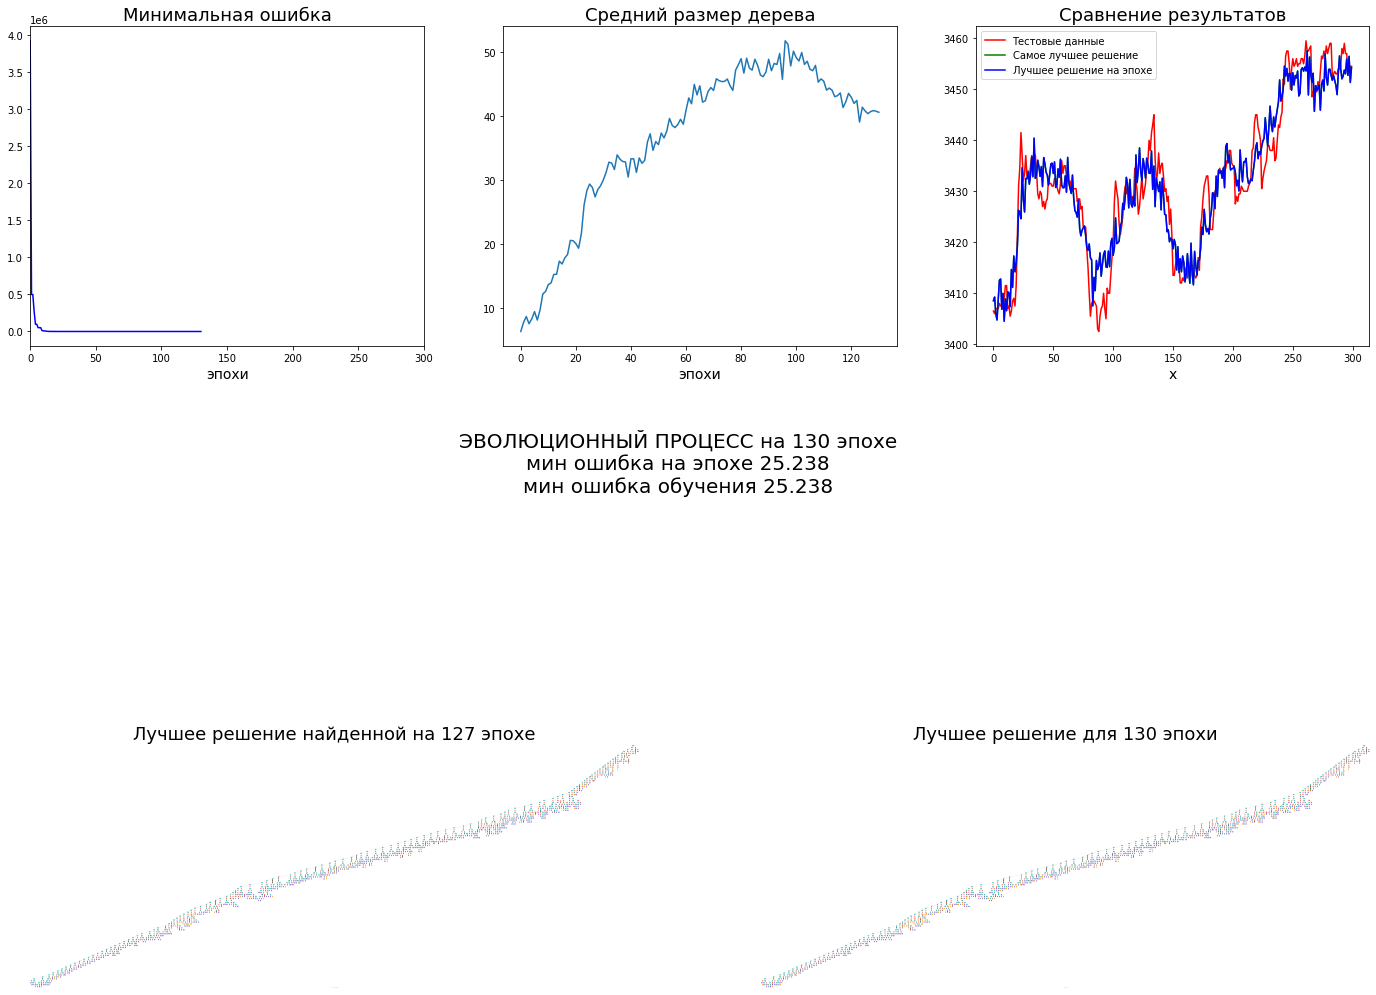

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

abort
abort


  0%|          | 0/420 [00:00<?, ?it/s]

abort


In [ ]:
# Глобальные константы обучеия
POP_SIZE        = 1000     # размер популиции
GENERATIONS     = 300     # количество генераций (эпох)

MIN_DEPTH       = 2       # минимальна глубина случайного дерева
MAX_DEPTH       = 7       # стартовая максимальная глубина случайного дерева
BAD_ERR = 1e20            # штраф при ошибке в оценке
INFLAT  = 0.001           # штраф за размер дерева при расчете фитнес

CROSS_RATE      = 0.8     # вероятность скрещивания 
PROB_MUTATION   = 0.3     # вероятность мутации 

DRIFT = True              # есть ли смещение констант обучения
POSEV = False             # есть ли посев с прошлого запуска

TOURNAMENT_SIZE = int(POP_SIZE*0.1)     # сколько берем для турнирного отбора
ELITE_SIZE      = int(POP_SIZE*0.01)     # сколько элитных особей учитываем
CHILD_SIZE      = int(POP_SIZE*0.5)      # сколько генерируем детей из отобранных


if POSEV: # если посев
    population = init_population(POP_SIZE - ELITE_SIZE) # создаем случайных за вычетом элиты с прошлого запуска
    population = np.concatenate((population, elite))    # добавляем элиту
    best_error = errors_elite[0]                        # запоминаем нименьшую ошибку прошлого запуска
    best_tree = elite[0]                                # запоминаем лучшее дерево прошлого запуска

else: # если нет посева
    population = init_population(POP_SIZE, CONSTANTS)   # создаем случайных с учетом внешних констант
    elite = np.array([])                                # для хранения особей элиты
    errors_elite = np.array([])                         # для хранения ошибки элиты
    fitnesses_elite = np.array([])                      # для хранения фитнес значений элиты
    best_tree = None                                    # лучшнего дерева нет
    best_error = BAD_ERR                                # ошибка максимальна



best_eph = 0                    # лучшне1 эпохи еще нет
max_mean_size = 0               # для хранения макс.среднего значения дерева на эпохе
estimation_trees = [ [], [] ]   # для сбора ошибки и макс.среднего значения дерева на эпохах

# цикл генераций
for EPOCH in range(GENERATIONS):
    if DRIFT:                                      # если смещения констант
        k = EPOCH/GENERATIONS                      # коэф смещения констант
        POP_SIZE = min(int(POP_SIZE *(1+0.05*k)), 700) # рост популяции
        TOURNAMENT_SIZE = int(POP_SIZE*0.1*(2-k))  # сколько берем для турнирного отбора
        ELITE_SIZE      = int(POP_SIZE*0.05)       # сколько элитных особей учитываем
        CHILD_SIZE      = int(POP_SIZE*0.6)        # сколько генерируем детей из отобранны
        CROSS_RATE      = 0.7*(1+0.2*k)            # вероятность скрещивания 
        PROB_MUTATION   = 0.2*(1-0.5*k)            # вероятность мутации 
        INFLAT          = 0.001*(1+2*k)            # штраф за размер дерева при расчете фитнес


    # получаем комплексную оценку (ошика и фитнесс) для текущей популяции
    estimations = np.array([estimation(ind, DATASET) for ind in population])
    errors, fitnesses = estimations[:,0], estimations[:,1]
    
    # получаем лучшее дерево и его ошибку на эпохе
    err_sort_idx = errors.argsort()
    best_on_eph = deepcopy(population[err_sort_idx[0]])
    err_epoch = min(errors)

    if err_epoch < best_error:               # сравниваем с лучшей оценкой
        best_error = err_epoch               # запоминаем новую мин.ошибку
        best_eph = EPOCH                     # запоминаем новую лучшую эпоху
        best_tree = deepcopy(best_on_eph)    # запоминаем новую лучшее дерево

    
    estimation_trees[0].append(err_epoch)    # добавляем мин.ошибку эпохи
    # получаем размеры деревьев популяции
    sizes = [BT.size_tree(ind, float) for ind in population]
    ms = np.mean(sizes)                      # находим средний размер дерева популяции
    MAX_DEPTH = int(ms)                      # обновляем из данных популяции
    if ms > max_mean_size:                   # сравниваем с прошлым максимальным средним размером 
        max_mean_size = ms                   # запоминаем новое значение
    estimation_trees[1].append(ms)           # добавляем размер дерева эпохи

    # обновляем элиту с комплексной оценкой
    elite, errors_elite, fitnesses_elite = get_elite(population, elite,
                                                     errors_elite, errors,
                                                     fitnesses_elite, fitnesses)
    # добавляем элиту в популяцию с ее комплексной оценкой
    population = np.concatenate((population, elite))
    fitnesses = np.concatenate((fitnesses, fitnesses_elite))
    errors = np.concatenate((errors, errors_elite))

    nextgen_population=[]                            # для новой популяции
    for _ in tqdm(range(CHILD_SIZE)):                # цикл новых рождений

        parent1 = selection(population, fitnesses)   # отбираем 1_го родителя
        parent2 = selection(population, fitnesses)   # отбираем 2_го родителя

        try:
          parent1.crossover(parent2)                 # скрещивание
          parent1.mutation(MAX_DEPTH)                # мутация
          #print('born')
          nextgen_population.append(parent1)         # добавление в новую популяцию
            
        except:                                      # пропускаем рождение если ошибка
            print('abort')
            pass
    
    # создание остатка в новую популяцию случайно
    rand_pop = init_population(len(population) - len(nextgen_population))
    nextgen_population.extend(rand_pop)         # добавление в новую популяцию
    population=np.array(nextgen_population)     # популяцию для новой эпохи готова

    # отображаем ход поиска каждые 10 эпох
    if EPOCH and not EPOCH % 10 or EPOCH == GENERATIONS-1: 
      clear_output(wait=True)
      plot_process(estimation_trees, best_on_eph, best_tree, best_eph, best_error)

    # запоминаем элиту и ее комплексную оценку на последней эпохи
    if EPOCH == GENERATIONS-1:
      elite, errors_elite, fitnesses_elite = get_elite(population, elite, errors_elite, errors, fitnesses_elite, fitnesses)

    # выходим из поиска если вдруг нашли лучш порога 
    if best_error <= 1e-1:
      print('best_of_run_error <= 1e-1')
      break